In [1]:
!pip install PyDrive

    100% |████████████████████████████████| 993kB 18.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
pwd

'/content'

In [0]:
download = drive.CreateFile({'id':'1t19mxKOrFgePTGOvoCyaB-bj4EguQ4Cq'})

In [6]:
download.GetContentFile('train-scene-classification.zip')
!unzip train-scene-classification.zip

Archive:  train-scene-classification.zip
   creating: train/
  inflating: train.csv               
  inflating: train/0.jpg             
  inflating: train/1.jpg             
  inflating: train/10.jpg            
  inflating: train/100.jpg           
  inflating: train/1000.jpg          
  inflating: train/10000.jpg         
  inflating: train/10001.jpg         
  inflating: train/10002.jpg         
  inflating: train/10003.jpg         
  inflating: train/10004.jpg         
  inflating: train/10005.jpg         
  inflating: train/10006.jpg         
  inflating: train/10007.jpg         
  inflating: train/10008.jpg         
  inflating: train/10009.jpg         
  inflating: train/1001.jpg          
  inflating: train/10010.jpg         
  inflating: train/10011.jpg         
  inflating: train/10012.jpg         
  inflating: train/10013.jpg         
  inflating: train/10014.jpg         
  inflating: train/10015.jpg         
  inflating: train/10016.jpg         
  inflating: train/10017.jp

In [0]:
mkdir data-test

In [18]:
cd data-test

/content/data-test


In [19]:
mkdir test_imgs

mkdir: cannot create directory ‘test_imgs’: File exists


In [20]:
cd test_imgs

/content/data-test/test_imgs


In [0]:
import os
import errno
import shutil
import pandas as pd

IMAGES ='/content/train'
DIR = '/content/data-test/test_imgs'


# Import training labels
data1 = pd.read_csv('test.csv')

# Moving files in respective directories
for images in data1['image_name']:
    shutil.move(IMAGES+'/'+images, DIR+'/'+images)

In [22]:
cd /..

/


In [23]:
cd content

/content


In [24]:
download = drive.CreateFile({'id':'1t19mxKOrFgePTGOvoCyaB-bj4EguQ4Cq'})
download.GetContentFile('train-scene-classification.zip')
!unzip train-scene-classification.zip

Archive:  train-scene-classification.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train.csv               
  inflating: train/0.jpg             
  inflating: train/1.jpg             
  inflating: train/10.jpg            
  inflating: train/100.jpg           
  inflating: train/1000.jpg          
  inflating: train/10000.jpg         
  inflating: train/10001.jpg         
  inflating: train/10002.jpg         
  inflating: train/10003.jpg         
  inflating: train/10004.jpg         
  inflating: train/10005.jpg         
  inflating: train/10006.jpg         
  inflating: train/10007.jpg         
  inflating: train/10008.jpg         
  inflating: train/10009.jpg         
  inflating: train/1001.jpg          
  inflating: train/10010.jpg         
  inflating: train/10011.jpg         
  inflating: train/10012.jpg         
  inflating: train/10013.jpg         
  inflating: train/10014.jpg         
  inflating: train/10015.jpg         
  inflating: train/10016.j

In [25]:
mkdir data-train

mkdir: cannot create directory ‘data-train’: File exists


In [26]:
cd data-train

/content/data-train


In [0]:
import os
import errno
import shutil
import pandas as pd

IMAGES ='/content/train'
DIR = ''

# Classes to be predicted
# buildings-0,forest-1,glacier-2,mountain-3,sea-4,street-5
classes = ['0', '1', '2', '3', '4', '5']

# Make directories
for class_ in classes:
    if not os.path.exists(DIR+class_):
        try:
            os.makedirs(DIR+class_)
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise

# Import training labels
data = pd.read_csv('train.csv')

# Moving files in respective directories
for images, labels in zip(data['image_name'], data['label']):
    shutil.move(IMAGES+'/'+images, DIR+str(labels)+'/'+images)

In [28]:
cd /..

/


In [29]:
cd /content

/content


In [30]:
download = drive.CreateFile({'id':'1t19mxKOrFgePTGOvoCyaB-bj4EguQ4Cq'})
download.GetContentFile('train-scene-classification.zip')
!unzip train-scene-classification.zip

Archive:  train-scene-classification.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train.csv               
  inflating: train/0.jpg             
  inflating: train/1.jpg             
  inflating: train/10.jpg            
  inflating: train/100.jpg           
  inflating: train/1000.jpg          
  inflating: train/10000.jpg         
  inflating: train/10001.jpg         
  inflating: train/10002.jpg         
  inflating: train/10003.jpg         
  inflating: train/10004.jpg         
  inflating: train/10005.jpg         
  inflating: train/10006.jpg         
  inflating: train/10007.jpg         
  inflating: train/10008.jpg         
  inflating: train/10009.jpg         
  inflating: train/1001.jpg          
  inflating: train/10010.jpg         
  inflating: train/10011.jpg         
  inflating: train/10012.jpg         
  inflating: train/10013.jpg         
  inflating: train/10014.jpg         
  inflating: train/10015.jpg         
  inflating: train/10016.j

In [31]:
ls

adc.json    data-train/   train/     train-scene-classification.zip
data-test/  sample_data/  train.csv


In [0]:
mkdir models

In [0]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from sklearn.utils import shuffle
from tqdm import tqdm_notebook

In [53]:
train_path='/content/'
test_path='/content/'
df = pd.read_csv('train.csv')
df['label'].value_counts()
#Classes to be predicted
# buildings-0,forest-1,glacier-2,mountain-3,sea-4,street-5

3    3037
2    2957
5    2883
4    2784
1    2745
0    2628
Name: label, dtype: int64

In [54]:
df.head()

image_name  label
0      0.jpg      0
1      1.jpg      4
2      2.jpg      5
3      4.jpg      0
4      7.jpg      4

In [0]:

from fastai import *
from fastai.vision import *

In [0]:

path='/content/train/'

In [0]:
tfms = get_transforms(do_flip=True,flip_vert=False,max_zoom=1.0,max_warp=0.2)
data = (ImageList.from_csv(path, csv_name = '/content/train.csv') 
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '/content/data-test/test_imgs')              
        .transform(tfms, size=224)
        .databunch(bs=16,num_workers=0))

In [7]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (13628 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,5,0,4,5
Path: /content/train;

Valid: LabelList (3406 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,1,1,5,0
Path: /content/train;

Test: LabelList (7301 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/train

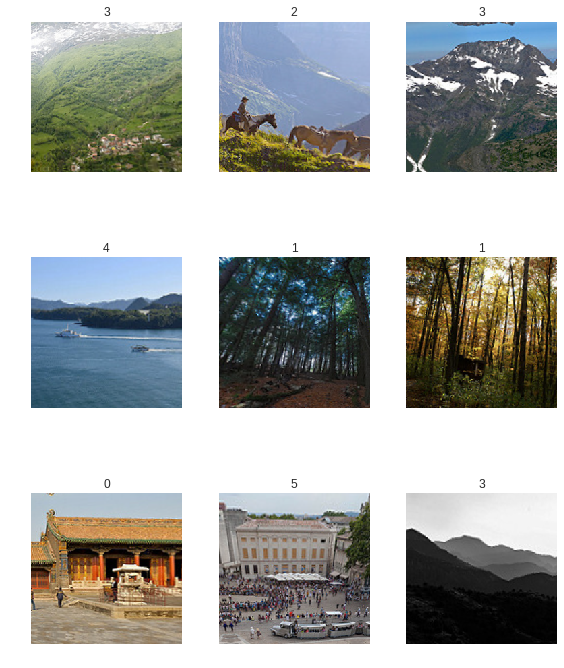

In [41]:
data.show_batch(rows=3, figsize=(8,10))

In [42]:
print(data.classes)

[0, 1, 2, 3, 4, 5]


In [0]:
learn = cnn_learner(data, models.resnet152, metrics=[error_rate, accuracy], model_dir="/content/models/")


In [44]:
learn.fit_one_cycle(5)


In [0]:
learn.save('/content/models/stage-1-nonorm-152-224-5')

In [46]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

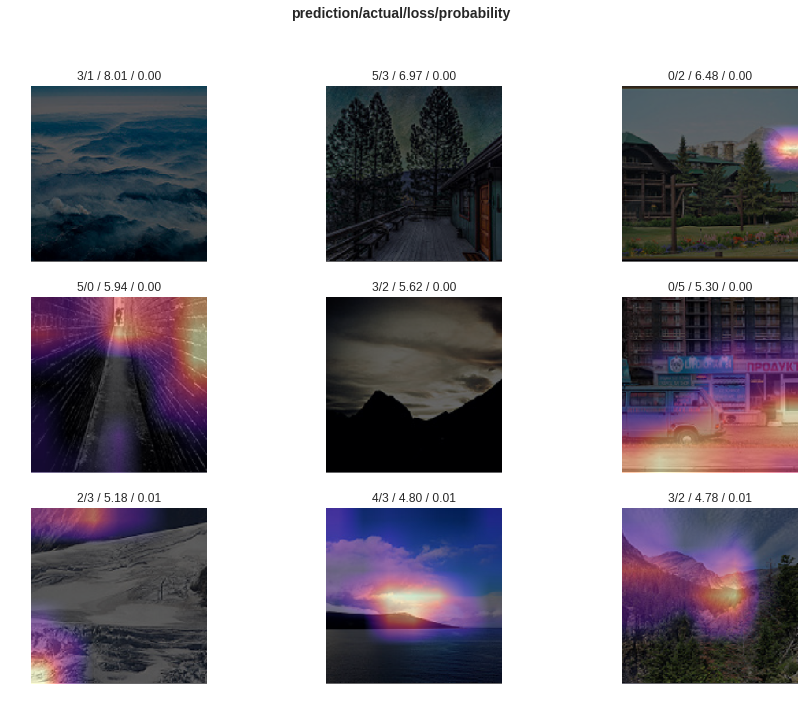

In [47]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
doc(interp.plot_top_losses)

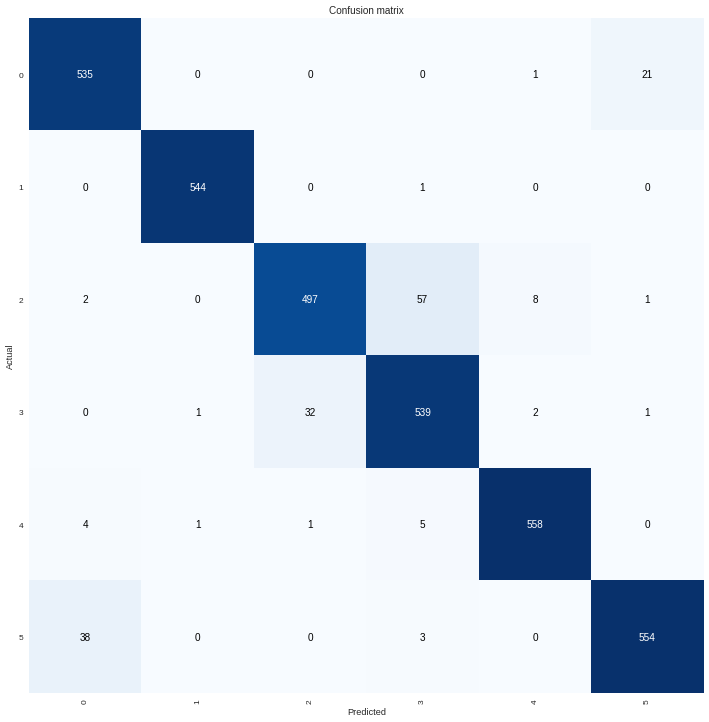

In [48]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [49]:
interp.most_confused(min_val=2)


[(2, 3, 57),
 (5, 0, 38),
 (3, 2, 32),
 (0, 5, 21),
 (2, 4, 8),
 (4, 3, 5),
 (4, 0, 4),
 (5, 3, 3),
 (2, 0, 2),
 (3, 4, 2)]

In [50]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


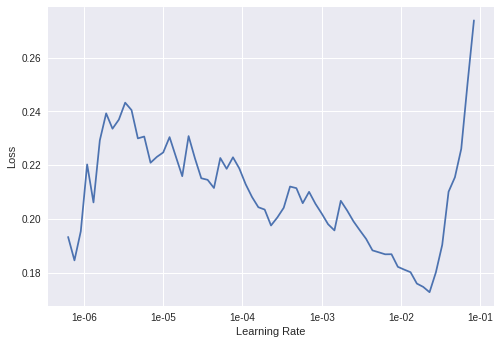

In [51]:
learn.recorder.plot()

In [0]:
learn.load('/content/models/stage-1-nonorm-152-224-5')

In [0]:
learn.unfreeze()

In [62]:
learn.fit_one_cycle(5, max_lr=slice(6e-6, 1e-4))

In [0]:
learn.save('/content/models/resnet-nonorm-stage-2-152-224')

In [0]:
ls

adc.json     models/       train/
data-test/   sample_data/  train.csv
data-train/  test.csv      train-scene-classification.zip


In [0]:
learn.export()

In [0]:
ls

adc.json     models/       train/
data-test/   sample_data/  train.csv
data-train/  test.csv      train-scene-classification.zip


In [65]:
path = learn.path
print(path)

/content/train


In [0]:
learn = load_learner(path)

In [0]:
test = pd.read_csv('/content/test.csv')

In [0]:
images = []
prediction = []
probability = []
for i in test['image_name']:
  images.append(i)
  link = str(path)+'/'+i
  img = open_image(link)
  pred_class,pred_idx,outputs = learn.predict(img)
  prediction.append(pred_class.obj)
  probability.append(outputs.abs().max().item())
answer = pd.DataFrame({'image_name':images,'label':prediction,'probability':probability})
answer.head()
answer.to_csv('/content/submission_resnet152-nonorm.csv')
  

In [0]:
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0.5)
data = (ImageList.from_csv(path, csv_name = '/content/train.csv') 
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '/content/data-test/test_imgs')              
        .transform(tfms, size=256)
        .databunch(num_workers=0)
        
       )  

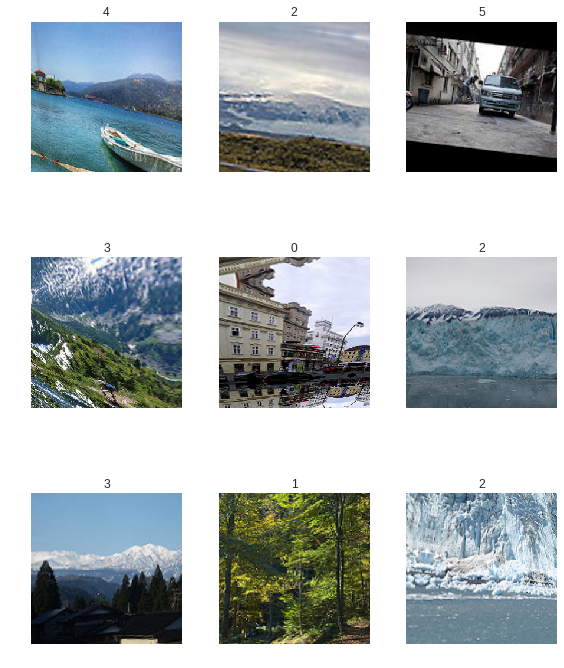

In [0]:
data.show_batch(rows=3, figsize=(8,10))

In [0]:
learn.load('/content/stage-2-34-128')

Learner(data=ImageDataBunch;

Train: LabelList (13628 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
4,5,4,1,5
Path: /content/train;

Valid: LabelList (3406 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
3,1,3,2,2
Path: /content/train;

Test: LabelList (7301 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: /content/train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, ker

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


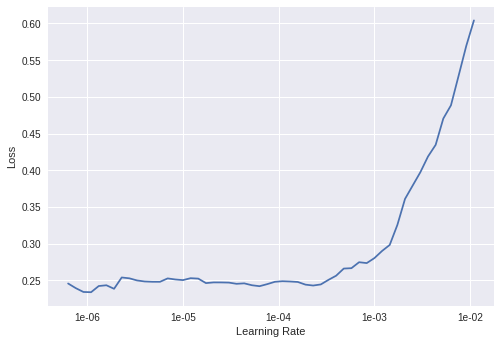

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

In [0]:
learn.export()

In [0]:
ls

In [0]:
learn = load_learner()